### Madden-Julian Oscillation (MJO) Metrics

This notebook demonstrates the basic use of the MJO metrics driver. It is assumed that you have run the download notebook to acquire the sample data before running this demo.

Scientific information about the MJO metrics is available through the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/mjo).

First we load the demo directory choices:

In [1]:
from user_choices import demo_data_directory, demo_output_directory

### Basic Use

The MJO driver can read a parameter file to load user settings. A basic parameter file is shown here:

In [2]:
with open("basic_mjo_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# ROOT PATH FOR MODELS CLIMATOLOGIES
modnames = ['ACCESS1-0','CanCM4']
modpath = 'demo_data/CMIP5_demo_clims/cmip5.historical.%(model)-0.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc'
varModel = 'pr'
ModUnitsAdjust = (True, 'multiply', 86400.0, 'mm d-1')  # kg m-2 s-1 to mm day-1
units = 'mm/d'
msyear = 1985
meyear = 2004

# ROOT PATH FOR OBSERVATIONS
reference_data_name = 'GPCP-2-3'
reference_data_path = 'demo_data/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/pr_day_GPCP-IP_BE_gn_v20200719_19980101-19981231.nc
varOBS = 'pr'
ObsUnitsAdjust = (True, 'multiply', 86400.0, 'mm d-1')  # kg m-2 s-1 to mm day-1
osyear = 1997
oeyear = 2010

# DIRECTORY WHERE TO PUT RESULTS
results_dir = 'demo_output/mjo'



This parameter file can be passed to the mjo driver via the command line:
```
mjo_metrics_driver.py -p basic_mjo_param.py
```

This example is run as a subprocess in the next cell.

In [7]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py

includeOBS: True
models: ['ACCESS1-0', 'CanCM4']
realization:  r1i1p1
demo_output/mjo
demo_output/mjo
demo_output/mjo
CMEC: False
debug:  False
parallel: False
 -----  obs  ---------------------
 ---  GPCP-2-3  ---
demo_data/PCMDIobs2/atmos/day/pr/GPCP-IP/gn/v20200719/pr_day_GPCP-IP_BE_gn_v20200719_19980101-19981231.nc
ewr:  nan
east power:  nan
west power:  nan
Done
 -----  ACCESS1-0  ---------------------
 -----  CanCM4  ---------------------


/Users/ordonez4/miniconda3/envs/test_pcmdi/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/ordonez4/miniconda3/envs/test_pcmdi/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/ordonez4/miniconda3/envs/test_pcmdi/lib/python3.8/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/ordonez4/miniconda3/envs/test_pcmdi/lib/python3.8/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
INFO::2021-02-24 11:34::pcmdi_metrics:: Results saved to a json file: /Users/ordonez4/Documents/git/pcmdi_metrics/doc/jupyter/Demo/demo_output/mjo/mjo_stat_cmip5_historical_da_atm_obs_GPCP-2-3_1985-2004.json
INFO::2021-02-24 11:34::pcmdi_metrics:: Results saved to a json file: /Users/or

### Command line arguments

It is also possible to use the command line to pass other arguments to the MJO driver. The command line arguments will override the settings in the parameter file.

In these example, we change a few different things. The new `case_id` will show up as a new folder in the result directory because of how the `result_dir` variable is set in the parameter file. NetCDF output and plots will be saved. The analysis start and end years for the models are changed to match the observations.

The `includeOBS` flag means that results will also be generated for observations, while the `no_OBS` flag excludes observations.

In [24]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py \
--case_id 'Ex2' \
--no_OBS \
--nc_out 'True' \
--plot 'True' \
--msyear 1998 \
--meyear 1999

includeOBS: False
models: ['ACCESS1-0', 'CanCM4']
realization:  r1i1p1
demo_output/mjo/Ex2
demo_output/mjo/Ex2
demo_output/mjo/Ex2
CMEC: False
debug:  False
parallel: False
 -----  ACCESS1-0  ---------------------
 -----  CanCM4  ---------------------


A png image is created showing the wavenumber-frequency power spectra.

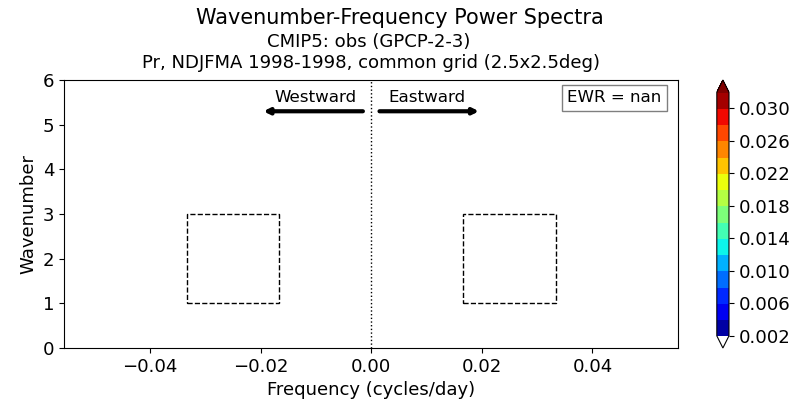

In [19]:
from IPython.display import Image
Image(filename=demo_output_directory+"/mjo/Ex2/cmip5_obs_historical_GPCP-2-3_mjo_1998-1998_cmmGrid.png")